In [1]:

import pandas as pd
import numpy as nm
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt

# Preprocessing 

In [2]:
price_sales_promotion =pd.read_csv("/Users/mac/Downloads/price_sales_promotion.csv" )

In [3]:
price_sales_promotion.shape

(21000, 6)

In [4]:
price_sales_promotion.head()


,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,201301,1141.500000,1033.432731,108.067269
1,Agency_01,SKU_01,201302,1141.500000,1065.417195,76.082805
2,Agency_01,SKU_01,201303,1179.345820,1101.133633,78.212187
3,Agency_01,SKU_01,201304,1226.687500,1138.283357,88.404143
4,Agency_01,SKU_01,201305,1230.331104,1148.969634,81.361470


In [5]:
industry_volume=pd.read_csv("/Users/mac/Downloads/industry_volume.csv" )

In [6]:
industry_volume.shape

(60, 2)

In [7]:
industry_volume.head()

,YearMonth,Industry_Volume
0,201301,492612703
1,201302,431937346
2,201303,509281531
3,201304,532390389
4,201305,551755254


In [8]:
industry_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   YearMonth        60 non-null     int64
 1   Industry_Volume  60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


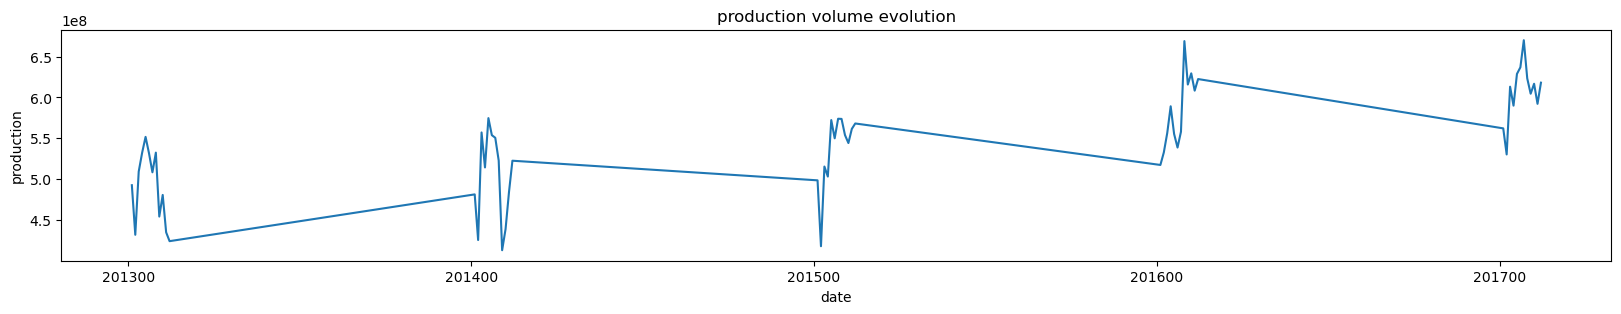

In [9]:
plt.figure(figsize=(20, 3))
plt.plot(industry_volume["YearMonth"], industry_volume["Industry_Volume"])
plt.xlabel("date")
plt.ylabel("production")
plt.title("production volume evolution")
plt.show()

In [10]:
industry_soda_sales=pd.read_csv("/Users/mac/Downloads/industry_soda_sales.csv" )


In [11]:
industry_soda_sales.shape

(60, 2)

In [12]:
industry_soda_sales.head()

,YearMonth,Soda_Volume
0,201301,718394219
1,201302,753938444
2,201303,892192092
3,201304,838099501
4,201305,864420003


## lets try to plot the sales from 2013 to 2017

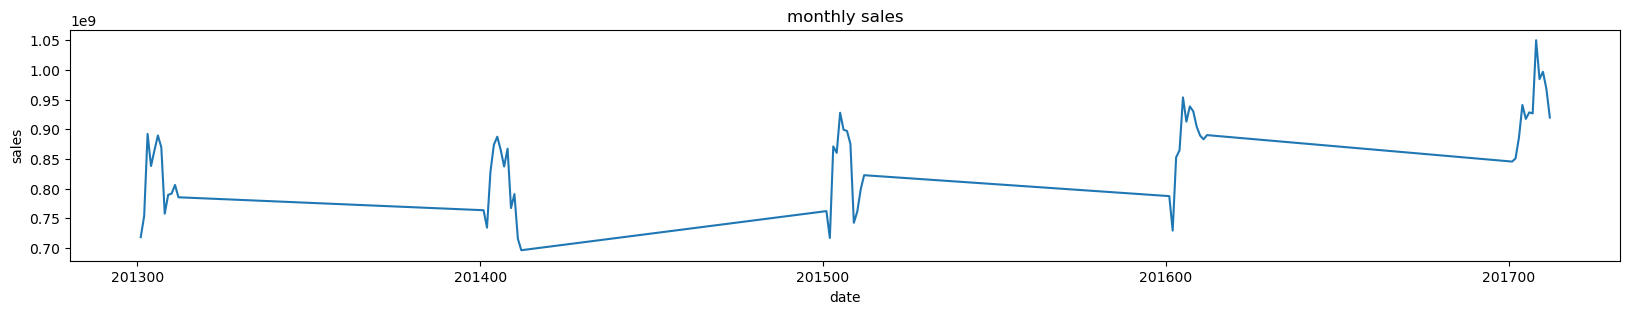

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(industry_soda_sales["YearMonth"], industry_soda_sales["Soda_Volume"])
plt.xlabel("date")
plt.ylabel("sales")
plt.title("monthly sales")
plt.show()

## lets check the increase of sales and its behave 

In [14]:
industry_soda_sales["Sales_diffirence"]=industry_soda_sales["Soda_Volume"].diff()
#industry_soda_sales["Sales_diffirence"] = industry_soda_sales["Sales_diffirence"].fillna("0")
industry_soda_sales.head()

,YearMonth,Soda_Volume,Sales_diffirence
0,201301,718394219,NaN
1,201302,753938444,35544225.0
2,201303,892192092,138253648.0
3,201304,838099501,-54092591.0
4,201305,864420003,26320502.0


In [15]:
print(industry_soda_sales.isnull().sum()) 


YearMonth           0
Soda_Volume         0
Sales_diffirence    1
dtype: int64


In [16]:
# Replace the specific value -1730823.0 with 0 in the 'Sales_diffirence' column,-1730823.0 might have been interpreted as NaN during data loading or by manual operations
#therefore replacing it with the mean or the median wont work, we replaced with zero here 
industry_soda_sales["Sales_diffirence"] = industry_soda_sales["Sales_diffirence"].replace(-1730823.0, 0)
# Verify the replacement
print(industry_soda_sales[industry_soda_sales["Sales_diffirence"] == 0])



    YearMonth  Soda_Volume  Sales_diffirence
54     201707    926635433               0.0


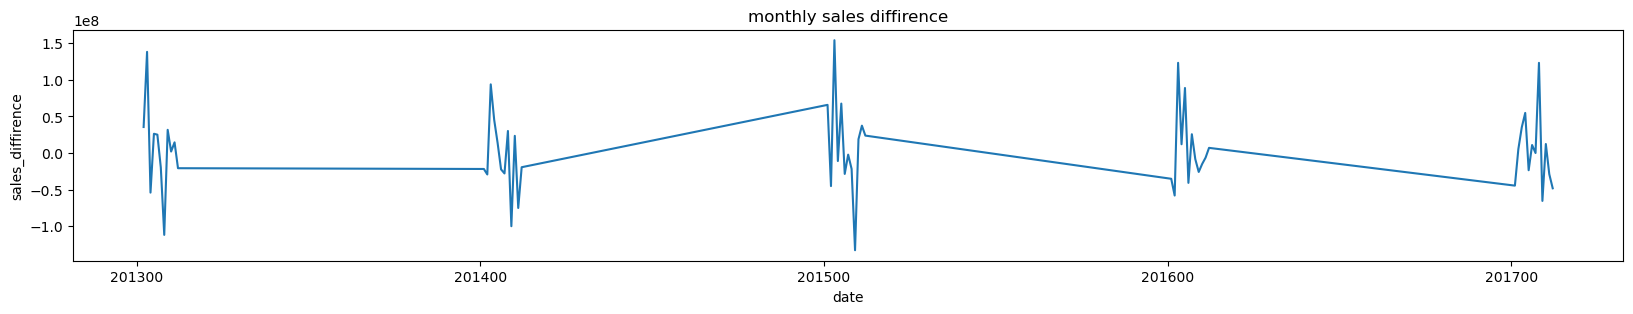

In [17]:
plt.figure(figsize=(20, 3))
plt.plot(industry_soda_sales["YearMonth"], industry_soda_sales["Sales_diffirence"])
plt.xlabel("date")
plt.ylabel("sales_diffirence")
plt.title("monthly sales diffirence")
plt.show()

In [18]:

min_sales_row = industry_soda_sales[industry_soda_sales["Sales_diffirence"] == industry_soda_sales["Sales_diffirence"].min()]
max_sales_row = industry_soda_sales[industry_soda_sales["Sales_diffirence"] == industry_soda_sales["Sales_diffirence"].max()]
# Print the row with the minimum Sales_diffirence
print("Row with Minimum Sales_diffirence:")
print(min_sales_row)

# Print the row with the maximum Sales_diffirence
print("\nRow with Maximum Sales_diffirence:")
print(max_sales_row)


Row with Minimum Sales_diffirence:
    YearMonth  Soda_Volume  Sales_diffirence
32     201509    742568762      -132815924.0

Row with Maximum Sales_diffirence:
    YearMonth  Soda_Volume  Sales_diffirence
26     201503    871204688       154150704.0


In [19]:
event_calendar=pd.read_csv("/Users/mac/Downloads/event_calendar.csv" )

In [20]:
event_calendar.shape

(61, 13)

In [21]:
event_calendar.head()

,YearMonth,Easter Day,Good Friday,New Year,Christmas,Labor Day,Independence Day,Revolution Day Memorial,Regional Games,FIFA U-17 World Cup,Football Gold Cup,Beer Capital,Music Fest
0,201301,0,0,1,0,0,0,0,0,0,0,0,0
1,201302,0,0,0,0,0,0,0,0,0,0,0,0
2,201303,1,1,0,0,0,0,0,0,0,0,0,1
3,201304,0,0,0,0,0,0,0,0,0,0,0,0
4,201305,0,0,0,0,1,0,0,0,0,0,0,0


In [23]:
demographics=pd.read_csv("/Users/mac/Downloads/demographics.csv")

In [ ]:
demographics.shape

In [24]:
demographics.head(100)

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_05,3044268,182944
1,Agency_02,3137874,240809
2,Agency_55,2025793,238553
3,Agency_53,1729177,111048
4,Agency_50,2057678,144594
5,Agency_07,1868030,175785
6,Agency_49,1880416,154532
7,Agency_46,1709754,212229
8,Agency_60,2180611,211936
9,Agency_57,2212416,187351


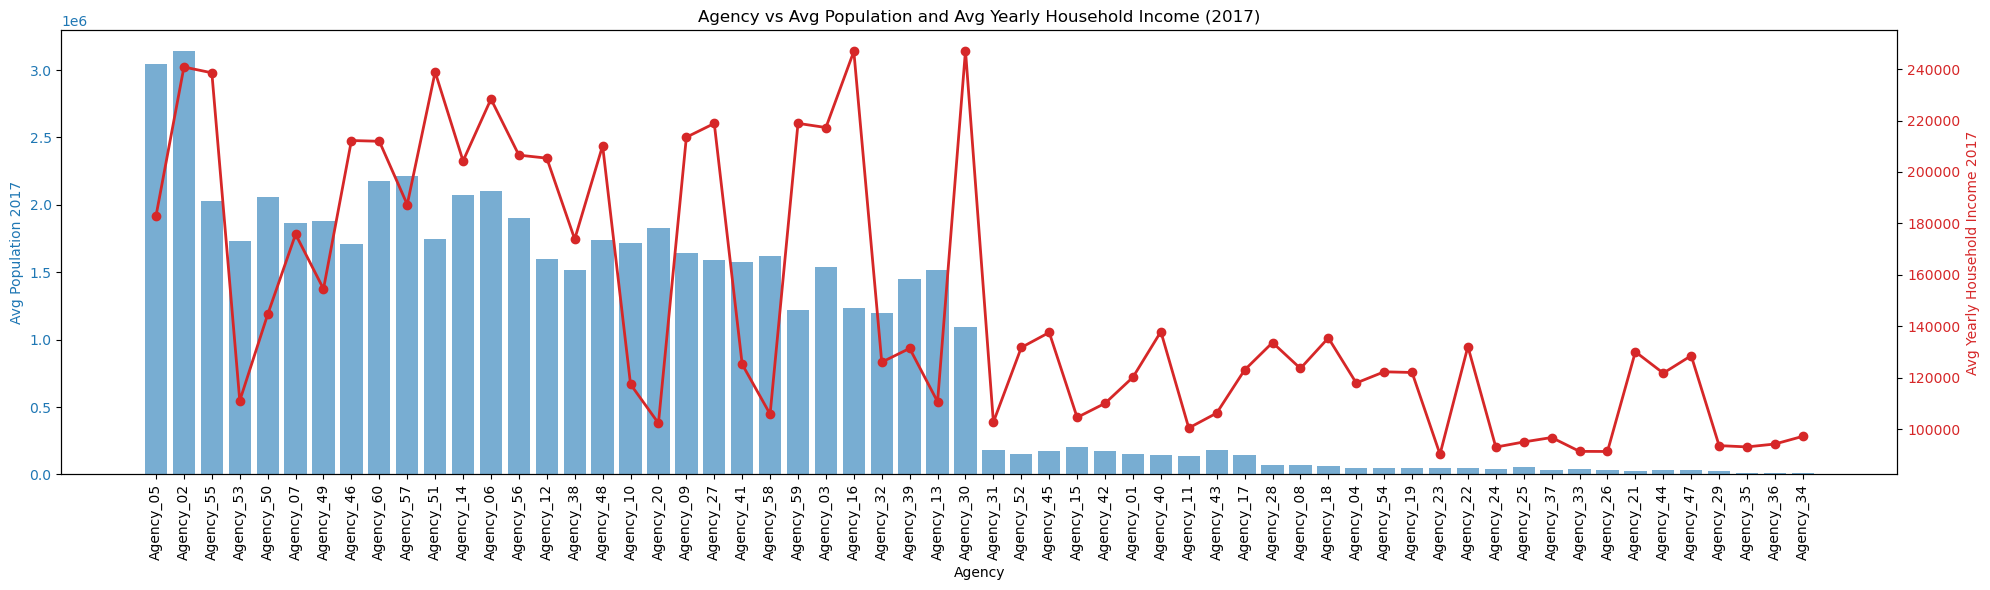

In [29]:
# Extract the relevant columns
agencies = demographics['Agency']
population = demographics['Avg_Population_2017']
income = demographics['Avg_Yearly_Household_Income_2017']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot population on the left y-axis
ax1.set_xlabel('Agency')
ax1.set_ylabel('Avg Population 2017', color='tab:blue')
ax1.bar(agencies, population, color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Create a second y-axis for average yearly household income
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Yearly Household Income 2017', color='tab:red')
ax2.plot(agencies, income, color='tab:red', marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Display the graph
plt.title('Agency vs Avg Population and Avg Yearly Household Income (2017)')
plt.tight_layout()
plt.show()


# Checking if there is empty data + redondancy

In [30]:
print(industry_volume.isnull().sum())
print(price_sales_promotion.isnull().sum())
print(event_calendar.isnull().sum()) 
print(demographics.isnull().sum())
price_sales_promotion.duplicated().sum()
industry_volume.duplicated().sum()







YearMonth          0
Industry_Volume    0
dtype: int64
Agency        0
SKU           0
YearMonth     0
Price         0
Sales         0
Promotions    0
dtype: int64
YearMonth                  0
Easter Day                 0
Good Friday                0
New Year                   0
Christmas                  0
Labor Day                  0
Independence Day           0
Revolution Day Memorial    0
Regional Games             0
FIFA U-17 World Cup        0
Football Gold Cup          0
Beer Capital               0
Music Fest                 0
dtype: int64
Agency                              0
Avg_Population_2017                 0
Avg_Yearly_Household_Income_2017    0
dtype: int64


0